In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt

In [56]:
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()
print(train_imgs.shape, train_labels.shape)
print(test_imgs.shape, test_labels.shape)

train1_imgs=train_imgs.reshape(-1,28,28,1)
test1_imgs=test_imgs.reshape(-1,28,28,1)
print (train_imgs[0].shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(28, 28)


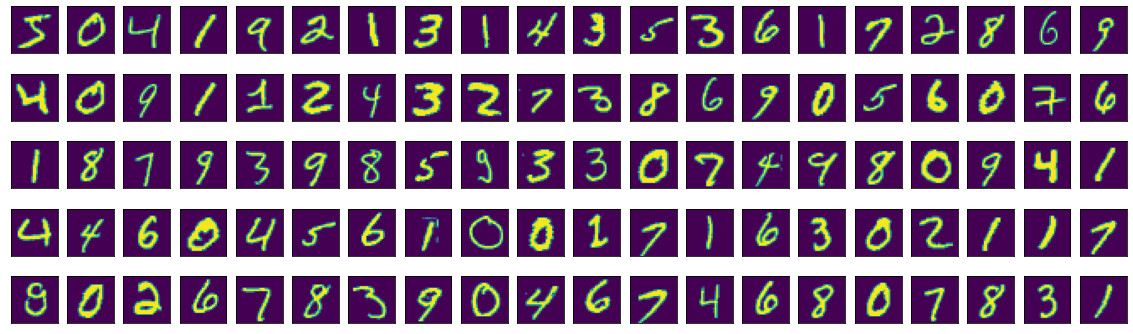

In [57]:
#train_labels[0]
plt.figure(figsize = (20, 6))

for i in range(100):
  plt.subplot(5, 20, i+1)
  plt.imshow(train_imgs[i])
  plt.xticks([])
  plt.yticks([])
plt.show()

In [58]:
  train_imgs, test_imgs = train_imgs.astype('float32')/255.0, test_imgs.astype('float32')/255.0

In [59]:
model = keras.Sequential([
                          #input layer
                          keras.Input(shape=(28,28,1)),

                          #hidden layers
                          layers.Conv2D(filters=32,kernel_size=(5,5), activation='relu'),
                          layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
                          layers.MaxPooling2D(pool_size =(2,2)),
                          layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                          layers.MaxPooling2D(pool_size =(2,2)),

                          layers.Flatten(),
                          layers.Dense(units = 256, activation = 'relu'),
                          layers.Dense(units = 128, activation = 'relu'),
                          #output layer
                          layers.Dense(units = 10, activation = 'softmax')

])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)              

In [60]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [61]:
h = model.fit(x=train1_imgs, y = train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 160s 85ms/step - loss: 0.1910 - accuracy: 0.9567
Epoch 2/10
1875/1875 [==============================] - 159s 85ms/step - loss: 0.0627 - accuracy: 0.9811
Epoch 3/10
1875/1875 [==============================] - 159s 85ms/step - loss: 0.0523 - accuracy: 0.9847
Epoch 4/10
1875/1875 [==============================] - 158s 84ms/step - loss: 0.0459 - accuracy: 0.9871
Epoch 5/10
1875/1875 [==============================] - 157s 84ms/step - loss: 0.0403 - accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 159s 85ms/step - loss: 0.0361 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 160s 85ms/step - loss: 0.0308 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 160s 85ms/step - loss: 0.0321 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 160s 85ms/step - loss: 0.0266 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] 

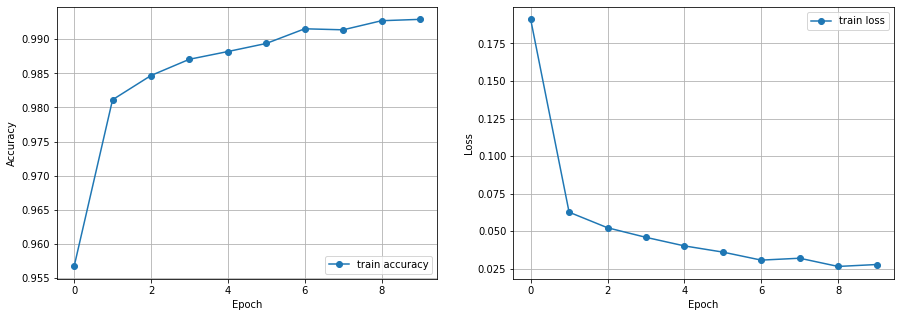

In [64]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()